# Titanic survived Project

## Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


## Attribute Information


Passenger id - Unique Id of the passenger

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived - Survived (0 = No; 1 = Yes)

Name - Name of the passenger

Sex - Sex of the passenger (Male, Female)

Age - Age of the passenger

Sibsp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard
 
Ticket - Ticket Number

Fare - Passenger Fare (British pound)

Cabin - Cabin

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


## Dataset Link-

https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
df=pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Statistical Summary

In [6]:
df.shape

(891, 12)

In [7]:
#Checking the names of the columns

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Where 0 means not survived and 1 means survived. So out of 891 passengers, 342 have survived and 549 have not survived.

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

216 passengers travelled 1st class, 184 passengers travelled 2nd class and 491 passengers travelled 3rd class.

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

577 male and 314 female passengers.

# Exploratory Data Analysis EDA

In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns Age, Cabin and Embarked have null values.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

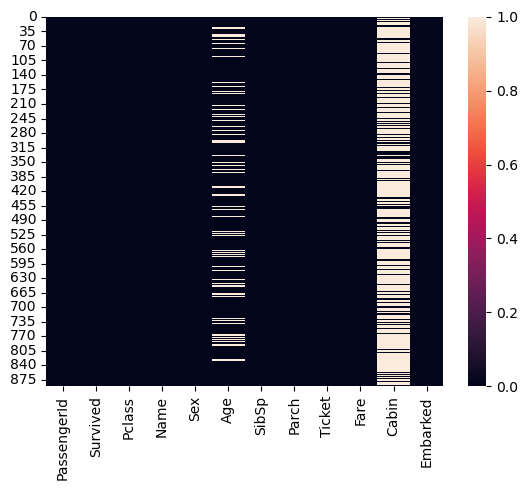

In [15]:
#We can also use heatmap to visualize if there is any null values presented

sns.heatmap(df.isnull())

As the columns Age and Cabin have a lot of missing data we cannot drop them, that's why for the column Age we gonna find the mean and fill in the missing values. For the Cabin column we gonna use the Simple Imputer as it contains categorical data.

In [16]:
df['Age']=df['Age'].fillna((df['Age'].mean()))

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy="most_frequent")

df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

We can drop the rows with null values in Embarked column as they are only 2.

In [20]:
df.dropna(axis=0, inplace=True)

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now we don't have missing values.

In [22]:
df.shape

(889, 12)

In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


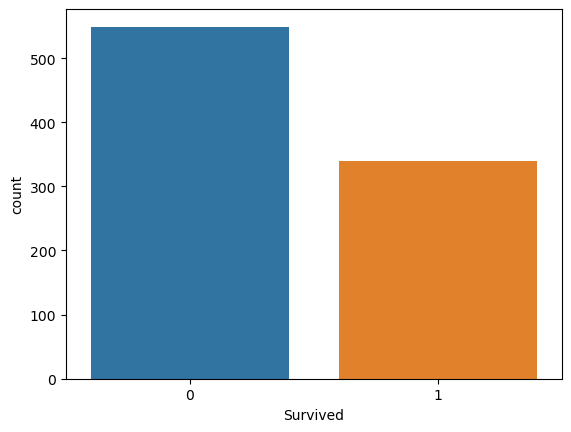

<Figure size 5000x500 with 0 Axes>

In [25]:
ax=sns.countplot(x='Survived', data=df)
plt.figure(figsize=(50,5))
plt.show()

Majority of the passengers have not survived.

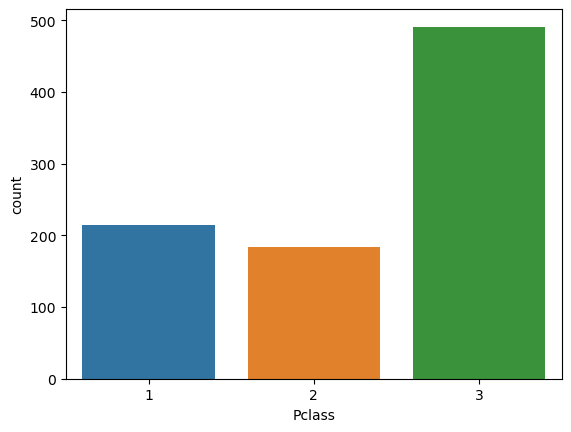

<Figure size 5000x500 with 0 Axes>

In [26]:
ax=sns.countplot(x='Pclass', data=df)
plt.figure(figsize=(50,5))
plt.show()

Majority of the passengers travelled in 3rd class. The number of passengers travelled in 1st and 2nd class is nearly equal.

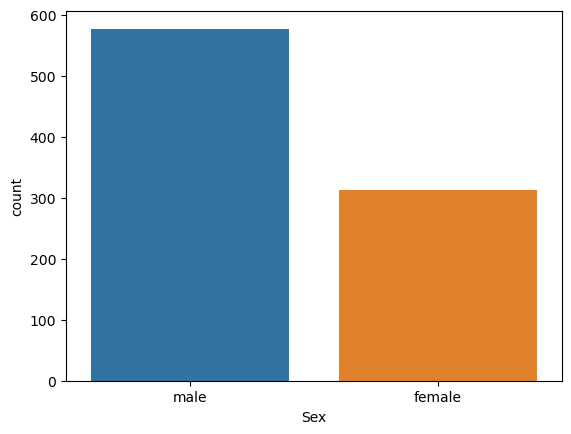

<Figure size 5000x500 with 0 Axes>

In [27]:
ax=sns.countplot(x='Sex', data=df)
plt.figure(figsize=(50,5))
plt.show()

Majority of the passengers are men. The number of women passenger is half of the man number.

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


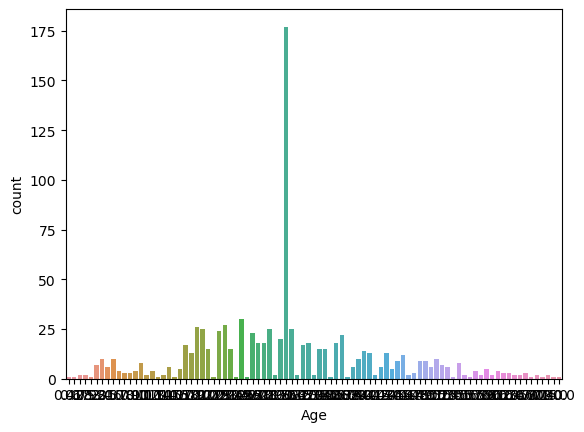

<Figure size 50000x500 with 0 Axes>

In [28]:
print(df['Age'].value_counts())
ax=sns.countplot(x='Age', data=df)
plt.figure(figsize=(500,5))
plt.show()

The majority of the passengers are in their late 20's.

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


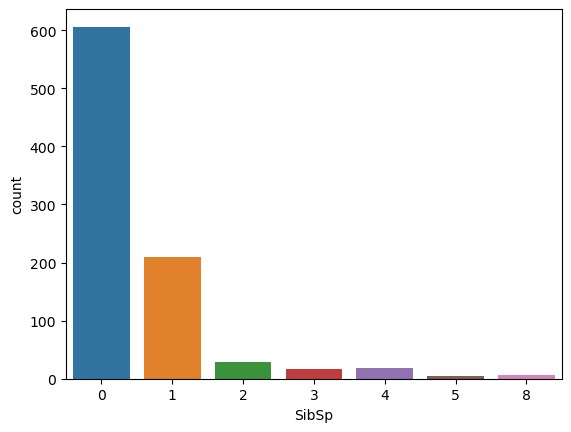

<Figure size 50000x500 with 0 Axes>

In [29]:
print(df['SibSp'].value_counts())

ax=sns.countplot(x='SibSp', data=df)
plt.figure(figsize=(500,5))
plt.show()

The majority of the passengers have no siblings on board.

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


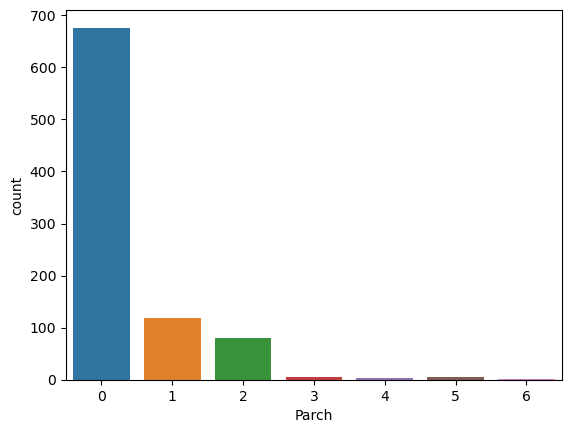

<Figure size 5000x500 with 0 Axes>

In [30]:
print(df['Parch'].value_counts())

ax=sns.countplot(x='Parch', data=df)
plt.figure(figsize=(50,5))
plt.show()

The majority of the passengers have no any parents/children on board.

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64


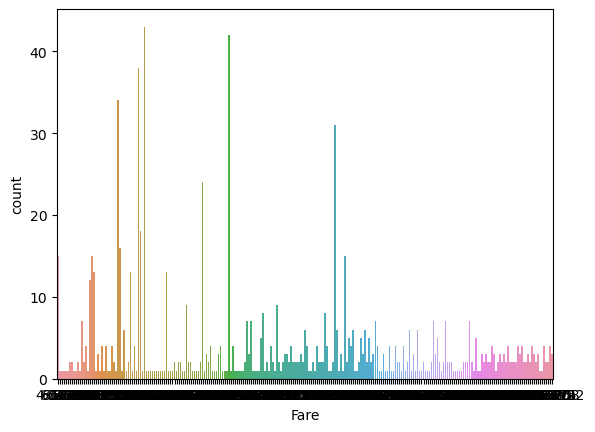

<Figure size 5000x500 with 0 Axes>

In [31]:
print(df['Fare'].value_counts())

ax=sns.countplot(x='Fare', data=df)
plt.figure(figsize=(50,5))
plt.show()

The majority of the passengers paid lower fare.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


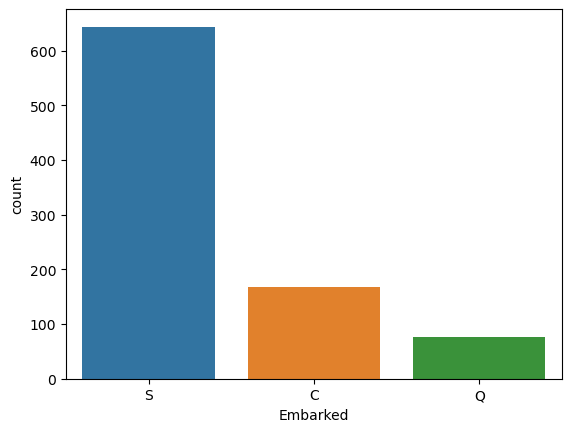

<Figure size 50000x500 with 0 Axes>

In [32]:
print(df['Embarked'].value_counts())

ax=sns.countplot(x='Embarked', data=df)
plt.figure(figsize=(500,5))
plt.show()

Where C = Cherbourg; Q = Queenstown; S = Southampton.

So majority of the passengers board the ship in Southampton. 

Text(0.5, 1.0, 'Number of survived vs class')

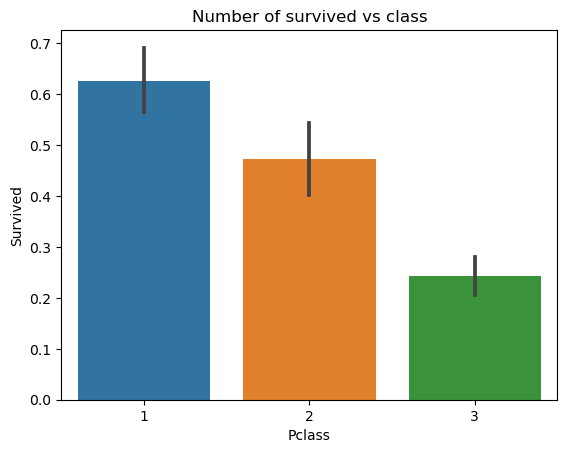

In [33]:
#Comparing number of survivals and the class they travelled.

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Number of survived vs class')

The majority of the survivals travelled 1st class. Passengers travelled 3rd class a lot less.

Text(0.5, 1.0, 'Number of children vs charges')

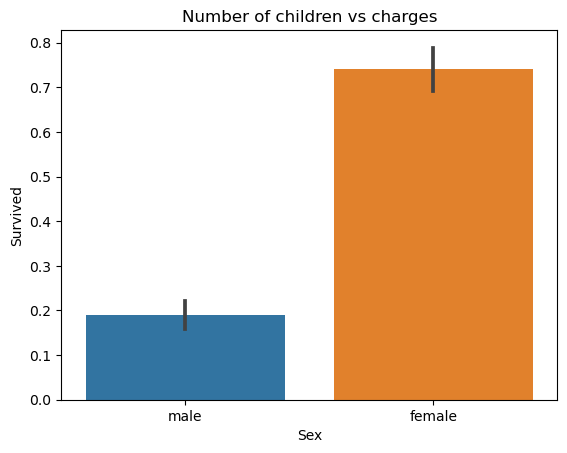

In [34]:
#Comparing number of survivals and sex.

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Number of children vs charges')

The number of females survived is a lot higher than for males.

## Cheking for skewness

In [35]:
df.skew()

PassengerId    0.000000
Survived       0.484568
Pclass        -0.636998
Age            0.431720
SibSp          3.691058
Parch          2.745160
Fare           4.801440
dtype: float64

The columns SibSp, Parch and Fare have skewness.

## Removing of skewness

In [36]:
df['SibSp']=np.cbrt(df['SibSp'])
df['Parch']=np.cbrt(df['Parch'])
df['Fare']=np.cbrt(df['Fare'])

In [37]:
df.skew()

PassengerId    0.000000
Survived       0.484568
Pclass        -0.636998
Age            0.431720
SibSp          1.029610
Parch          1.344861
Fare           1.240647
dtype: float64

The skewness has been reduced.

## Checking the correlation

In [38]:
cor=df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.061798,0.001736,-0.002229
Survived,-0.005028,1.000000,-0.335549,-0.074673,0.073135,0.133968,0.319617
Pclass,-0.035330,-0.335549,1.000000,-0.327954,-0.026225,-0.016485,-0.654484
Age,0.030300,-0.074673,-0.327954,1.000000,-0.196166,-0.248347,0.100743
SibSp,-0.061798,0.073135,-0.026225,-0.196166,1.000000,0.464613,0.352684
Parch,0.001736,0.133968,-0.016485,-0.248347,0.464613,1.000000,0.345175
Fare,-0.002229,0.319617,-0.654484,0.100743,0.352684,0.345175,1.000000


<Axes: >

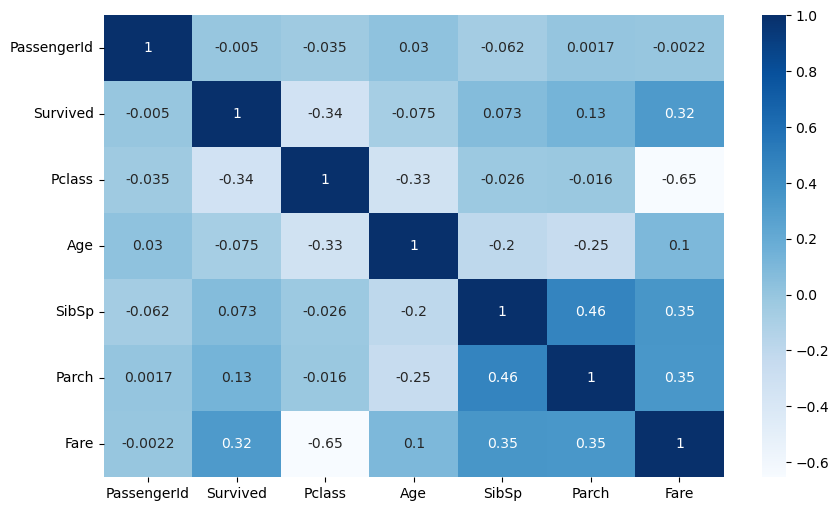

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

The is negative correlation between Survived and Pclass. 
Also Survived and Fare are correlated too.

As some of the columns have no use in our dataset we can drop them.

In [40]:
df.drop(["PassengerId", "Name" , "Ticket", "Cabin"],axis=1,inplace=True)

In [41]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1.0,0.000000,1.935438,S
1,1,1,female,38.000000,1.0,0.000000,4.146318,C
2,1,3,female,26.000000,0.0,0.000000,1.993730,S
3,1,1,female,35.000000,1.0,0.000000,3.758647,S
4,0,3,male,35.000000,0.0,0.000000,2.004158,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0.0,0.000000,2.351335,S
887,1,1,female,19.000000,0.0,0.000000,3.107233,S
888,0,3,female,29.699118,1.0,1.259921,2.862294,S
889,1,1,male,26.000000,0.0,0.000000,3.107233,C


## Encoding categorical data

The Titanic dataset contains categorical and numerical data. The categorical data has to be to converted to numerical. For this purpose we gonna use the LabelEncoder.

In [42]:
df[['Sex','Embarked']] = df[['Sex','Embarked']].astype('category')
df.dtypes

Survived       int64
Pclass         int64
Sex         category
Age          float64
SibSp        float64
Parch        float64
Fare         float64
Embarked    category
dtype: object

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.Sex = le.fit_transform(df.Sex)
df.Embarked = le.fit_transform(df.Embarked)

df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked      int32
dtype: object

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,1.935438,2
1,1,1,0,38.0,1.0,0.0,4.146318,0
2,1,3,0,26.0,0.0,0.0,1.993730,2
3,1,1,0,35.0,1.0,0.0,3.758647,2
4,0,3,1,35.0,0.0,0.0,2.004158,2


Now our dataset has only numerical data.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    float64
 5   Parch     889 non-null    float64
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(4), int32(2), int64(2)
memory usage: 55.6 KB


## Checking for outliers

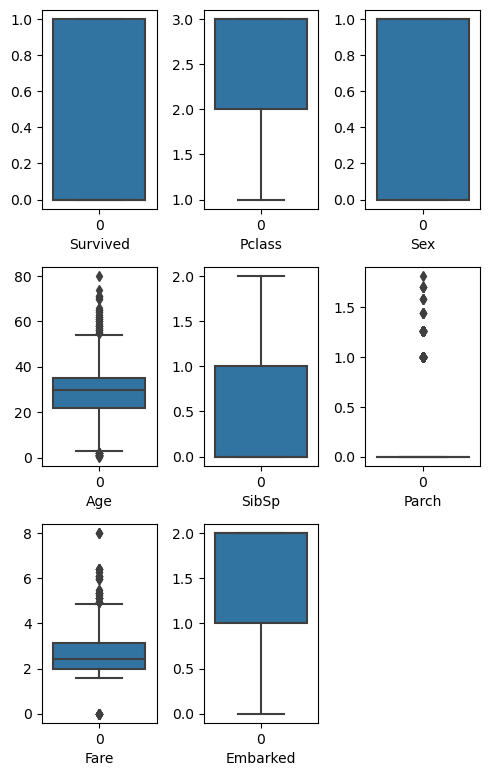

In [46]:
plt.figure(figsize=(5,10), facecolor='white')
plotnumber =1
for col in df:
    if plotnumber <=8:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(df[col]) 
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.tight_layout()

There is outliers presented in Age, Parch and Fare columns.

## Removing the outliers

In [47]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.786961,0.825209,0.735342,0.590495,1.185287,0.552463,0.772405,0.586840
1,1.270711,1.572211,1.359911,0.643971,1.185287,0.552463,1.292708,1.939555
2,1.270711,0.825209,1.359911,0.281878,0.661650,0.552463,0.717956,0.586840
3,1.270711,1.572211,1.359911,0.412509,1.185287,0.552463,0.930597,0.586840
4,0.786961,0.825209,0.735342,0.412509,0.661650,0.552463,0.708216,0.586840
...,...,...,...,...,...,...,...,...
886,0.786961,0.373501,0.735342,0.204724,0.661650,0.552463,0.383929,0.586840
887,1.270711,1.572211,1.359911,0.821957,0.661650,0.552463,0.322131,0.586840
888,0.786961,0.825209,1.359911,0.003524,1.185287,1.996949,0.093342,0.586840
889,1.270711,1.572211,0.735342,0.281878,0.661650,0.552463,0.322131,1.939555


In [48]:
threshold=3
print(np.where(z>3))

(array([ 27,  87,  95, 115, 117, 158, 179, 200, 257, 298, 310, 323, 340,
       379, 437, 492, 526, 556, 629, 671, 677, 678, 699, 715, 736, 741,
       744, 791, 844, 849, 861], dtype=int64), array([6, 6, 3, 3, 6, 4, 4, 4, 6, 6, 6, 4, 6, 6, 6, 3, 6, 6, 3, 3, 5, 6,
       6, 6, 6, 6, 3, 4, 4, 3, 4], dtype=int64))


In [49]:
df1=df[(z<3).all(axis=1)]
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1.0,0.000000,1.935438,2
1,1,1,0,38.000000,1.0,0.000000,4.146318,0
2,1,3,0,26.000000,0.0,0.000000,1.993730,2
3,1,1,0,35.000000,1.0,0.000000,3.758647,2
4,0,3,1,35.000000,0.0,0.000000,2.004158,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.0,0.000000,2.351335,2
887,1,1,0,19.000000,0.0,0.000000,3.107233,2
888,0,3,0,29.699118,1.0,1.259921,2.862294,2
889,1,1,1,26.000000,0.0,0.000000,3.107233,0


31 rows have been removed as an outliers.

## Checking Variance Inflation Factor VIF

In [50]:
x=df1.drop('Survived', axis=1)
y=df1['Survived']

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,5.573852,Pclass
1,3.107093,Sex
2,6.690624,Age
3,1.957349,SibSp
4,1.832563,Parch
5,7.879687,Fare
6,4.816977,Embarked


# Machine Learning

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Creating train test split

In [53]:
x=df1.drop('Survived', axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1.0,0.0,1.935438,2
1,1,0,38.0,1.0,0.0,4.146318,0
2,3,0,26.0,0.0,0.0,1.993730,2
3,1,0,35.0,1.0,0.0,3.758647,2
4,3,1,35.0,0.0,0.0,2.004158,2


In [54]:
y=y=df1['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=10)

In [56]:
x_train.shape

(600, 7)

In [57]:
y_train.shape

(600,)

In [58]:
x_test.shape

(258, 7)

In [59]:
y_test.shape

(258,)

## Logistic Regression

In [68]:
lg=LogisticRegression()

In [69]:
lg.fit(x_train,y_train)

LogisticRegression()

In [70]:
lgpred=lg.predict(x_test)
lgpred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [71]:
print('Accuracy Score of Logistics Regression: ', accuracy_score(y_test, lgpred))

Accuracy Score of Logistics Regression:  0.8178294573643411


In [72]:
print(confusion_matrix(y_test, lgpred))

[[142  18]
 [ 29  69]]


In [73]:
print(classification_report(y_test,lgpred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       160
           1       0.79      0.70      0.75        98

    accuracy                           0.82       258
   macro avg       0.81      0.80      0.80       258
weighted avg       0.82      0.82      0.82       258



82% accuracy.

## GaussianNB

In [74]:
gnb=GaussianNB()

In [75]:
gnb.fit(x_train,y_train)

GaussianNB()

In [76]:
gnbpred=gnb.predict(x_test)
gnbpred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [77]:
print('Accuracy Score of GaussianNB: ', accuracy_score(y_test, gnbpred))

Accuracy Score of GaussianNB:  0.8178294573643411


In [78]:
print(confusion_matrix(y_test, gnbpred))

[[136  24]
 [ 23  75]]


In [79]:
print(classification_report(y_test,gnbpred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       160
           1       0.76      0.77      0.76        98

    accuracy                           0.82       258
   macro avg       0.81      0.81      0.81       258
weighted avg       0.82      0.82      0.82       258



GaussianNB gives us also 82% accuracy.

## KNN

In [108]:
knn=KNeighborsClassifier(n_neighbors=13)

In [109]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [110]:
knnpred=knn.predict(x_test)
knnpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [111]:
print('Accuracy Score of KNN: ', accuracy_score(y_test, knnpred))

Accuracy Score of KNN:  0.7403100775193798


In [85]:
print(confusion_matrix(y_test, knnpred))

[[137  23]
 [ 44  54]]


In [86]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       160
           1       0.70      0.55      0.62        98

    accuracy                           0.74       258
   macro avg       0.73      0.70      0.71       258
weighted avg       0.74      0.74      0.73       258



KNN classifier gives us 74% accuracy.

## Decision Tree

In [87]:
dtc=DecisionTreeClassifier()

In [88]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
dtcpred=dtc.predict(x_test)
dtcpred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [91]:
print('Accuracy Score of Decision Tree Classifier: ', accuracy_score(y_test, dtcpred))

Accuracy Score of Decision Tree Classifier:  0.7558139534883721


In [92]:
print(confusion_matrix(y_test, dtcpred))

[[125  35]
 [ 28  70]]


In [93]:
print(classification_report(y_test,dtcpred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       160
           1       0.67      0.71      0.69        98

    accuracy                           0.76       258
   macro avg       0.74      0.75      0.74       258
weighted avg       0.76      0.76      0.76       258



76% accuracy.

## Support Vector Classifier

In [94]:
svc=SVC()

In [95]:
svc.fit(x_train,y_train)

SVC()

In [96]:
svcpred=svc.predict(x_test)
svcpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [97]:
print('Accuracy Score of SVC: ', accuracy_score(y_test, svcpred))

Accuracy Score of SVC:  0.6356589147286822


In [98]:
print(confusion_matrix(y_test, svcpred))

[[155   5]
 [ 89   9]]


In [99]:
print(classification_report(y_test,svcpred))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77       160
           1       0.64      0.09      0.16        98

    accuracy                           0.64       258
   macro avg       0.64      0.53      0.46       258
weighted avg       0.64      0.64      0.54       258



64% accuracy.

## Random Forest Classifier

In [112]:
rfc=RandomForestClassifier(n_estimators=200, random_state=42)

In [113]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [114]:
rfcpred= rfc.predict(x_test)
rfcpred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [115]:
print('Accuracy Score of RFC: ', accuracy_score(y_test, rfcpred))

Accuracy Score of RFC:  0.7945736434108527


In [116]:
print(confusion_matrix(y_test, rfcpred))

[[132  28]
 [ 25  73]]


In [117]:
print(classification_report(y_test,rfcpred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       160
           1       0.72      0.74      0.73        98

    accuracy                           0.79       258
   macro avg       0.78      0.78      0.78       258
weighted avg       0.80      0.79      0.80       258



79% accuracy.

## AdaBoostClassifier

In [118]:
abc=AdaBoostClassifier()

In [119]:
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [120]:
abcpred=abc.predict(x_test)
abcpred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [121]:
print('Accuracy Score of ABC: ', accuracy_score(y_test, abcpred))

Accuracy Score of ABC:  0.7984496124031008


In [122]:
print(confusion_matrix(y_test, abcpred))

[[131  29]
 [ 23  75]]


In [123]:
print(classification_report(y_test,abcpred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       160
           1       0.72      0.77      0.74        98

    accuracy                           0.80       258
   macro avg       0.79      0.79      0.79       258
weighted avg       0.80      0.80      0.80       258



80% accuracy.

## GradientBoostingClassifier

In [124]:
gb=GradientBoostingClassifier()

In [125]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [126]:
gbpred=gb.predict(x_test)
gbpred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [127]:
print(confusion_matrix(y_test, gbpred))

[[134  26]
 [ 21  77]]


In [128]:
print(classification_report(y_test,gbpred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       160
           1       0.75      0.79      0.77        98

    accuracy                           0.82       258
   macro avg       0.81      0.81      0.81       258
weighted avg       0.82      0.82      0.82       258



82% accuracy.

## BaggingClassifier

In [129]:
bc=BaggingClassifier()

In [130]:
bc.fit(x_train,y_train)

BaggingClassifier()

In [131]:
bcpred=bc.predict(x_test)
bcpred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [132]:
print('Accuracy Score of BC: ', accuracy_score(y_test, bcpred))

Accuracy Score of BC:  0.8023255813953488


In [133]:
print(confusion_matrix(y_test, bcpred))

[[133  27]
 [ 24  74]]


In [134]:
print(classification_report(y_test,bcpred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       160
           1       0.73      0.76      0.74        98

    accuracy                           0.80       258
   macro avg       0.79      0.79      0.79       258
weighted avg       0.80      0.80      0.80       258



80% accuracy.

## Extra Trees Classifier

In [135]:
et=ExtraTreesClassifier()

In [136]:
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [137]:
etpred=et.predict(x_test)
etpred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [138]:
print('Accuracy Score of ETC: ', accuracy_score(y_test, etpred))

Accuracy Score of ETC:  0.7751937984496124


In [139]:
print(confusion_matrix(y_test, etpred))

[[130  30]
 [ 28  70]]


In [140]:
print(classification_report(y_test,etpred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       160
           1       0.70      0.71      0.71        98

    accuracy                           0.78       258
   macro avg       0.76      0.76      0.76       258
weighted avg       0.78      0.78      0.78       258



78% accuracy.

### Observation:

#### As we have only two outcomes of the problem, so that means it's binary classification problem. 
#### GaussianNB and GradientBoostingClassifier give us the best accuracy score 82%.
##### We will use the GradientBoostingClassifier for our prediction purposes.

## Cross Validation Score

In [142]:
from sklearn.model_selection import cross_val_score

In [146]:
# CV score for GB Classifier

score=cross_val_score(gb,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())

Score:  [0.79069767 0.80232558 0.84302326 0.79532164 0.8245614 ]
Mean Score:  0.8111859105127159
Std deviation:  0.019710244948123887


# Prediction of an arbitrary passenger on Titanic would survive the sinking or not

In [147]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1.0,0.000000,1.935438,2
1,1,1,0,38.000000,1.0,0.000000,4.146318,0
2,1,3,0,26.000000,0.0,0.000000,1.993730,2
3,1,1,0,35.000000,1.0,0.000000,3.758647,2
4,0,3,1,35.000000,0.0,0.000000,2.004158,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.0,0.000000,2.351335,2
887,1,1,0,19.000000,0.0,0.000000,3.107233,2
888,0,3,0,29.699118,1.0,1.259921,2.862294,2
889,1,1,1,26.000000,0.0,0.000000,3.107233,0


The arbitrary passenger is 35 years old male with 1 spouse and 3 children on board. He board the ship from Southampton and paid £3.01 Fare and travelled 2nd class.

In [149]:
data = {'Pclass':2, 'Sex':1, 'Age':35, 'SibSp':1, 'Parch':3, 'Fare':3.01, 'Embarked':0.6}
index=[0]
new_passenger=pd.DataFrame(data,index)
new_passenger

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,35,1,3,3.01,0.6


In [150]:
new_predict=gb.predict(new_passenger)
print("The arbitary passenger will ", new_predict)

The arbitary passenger will  [0]


### Where 0 is No. So he won't survive.

# Saving the model

In [151]:
import joblib

joblib.dump(lr, 'lrmodel.obj')

['lrmodel.obj']